In [68]:
#load modules
from matplotlib import pyplot as plt
import numpy as np
from spectral1d import solve_nonlinear_problem # needed module
from overscreening_breakdown import overscreening_breakdown #needed module
%matplotlib inline

L =  4
newton: relative target tolerance =  1.0099504938362077e-11
newton: iteration  1 , residual norm  8.802931576274704e-07 , wight =  1.0
newton: iteration  2 , residual norm  4.73848771907907e-12 , wight =  1.0
converged with norm =  4.73848771907907e-12
L =  4
newton: relative target tolerance =  1.0099504938362077e-11
newton: iteration  1 , residual norm  1.7958997594166711e-09 , wight =  1.0
newton: iteration  2 , residual norm  5.059138750395036e-13 , wight =  1.0
converged with norm =  5.059138750395036e-13
L =  4
newton: relative target tolerance =  1.0099504938362077e-11
newton: iteration  1 , residual norm  1.864158640543286e-09 , wight =  1.0
newton: iteration  2 , residual norm  1.5656312762622606e-12 , wight =  1.0
converged with norm =  1.5656312762622606e-12
L =  4
newton: relative target tolerance =  1.0099504938362077e-11
newton: iteration  1 , residual norm  1.93339887809693e-09 , wight =  1.0
newton: iteration  2 , residual norm  5.893466158649913e-13 , wight =  1

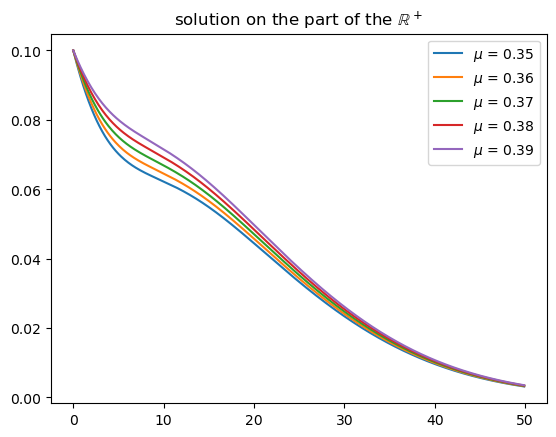

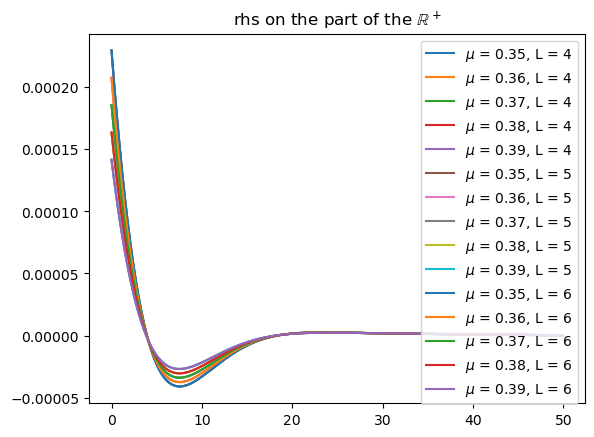

In [69]:
sigma = 20.0
mu = 0.36
gamma = 1
delta = 10.0
u0 = 0.1
u0xxx = 0

def some_func(x):
    return u0*np.exp(-x**2)

problem = overscreening_breakdown()
N = 100
domain = [0,np.inf]
tolerance = 1.0e-12
use_method = "newton"
Ls = [4,5,6]


mu_all = [0.35, 0.36, 0.37, 0.38, 0.39]
c_all = []
rhs_all = []
solution_all = []
x = np.arange(0.0, 50.0, 0.1)
c = None
for L in Ls:
    rhs_all_mu = []
    solution_all = []
    for mu_l in mu_all:
        solver = solve_nonlinear_problem(N=N, domain=[0,np.inf], tolerance=tolerance, use_method=use_method)
        print("L = ", L)
        solver.set_mapping_parameter(L)    
        problem.set_parameters(sigma = sigma, mu = mu_l, gamma = gamma, delta = delta, u0 = u0, u0xxx=u0xxx, initial_guess_solution=some_func)
        solver.set_problem(problem)
        if type(c) == None:
            c = solver.solve_problem()
        else:
            c = solver.solve_problem(c)
        rhs_l = solver.obtain_rhs_in_domain(c, x, problem)
        solution_l = solver.obtain_solution_in_domain(c, x)    
        rhs_all_mu.append(rhs_l)
        solution_all.append(solution_l)    
    rhs_all.append(rhs_all_mu)
        
plt.title("solution on the part of the $\mathbb{R}^+$")
legend = []
for solution,mu in zip(solution_all, mu_all):
    plt.plot(x, solution)
    legend.append("$\mu$ = {}".format(mu))
plt.legend(legend)
plt.show()

legend = []
plt.title("rhs on the part of the $\mathbb{R}^+$")
for rhs_all_L, L in zip(rhs_all, Ls):
    for rhs,mu in zip(rhs_all_L, mu_all):
        plt.plot(x, rhs)
        legend.append("$\mu$ = {}, L = {}".format(mu, L))
plt.legend(legend)    
plt.show()



In [59]:
def integrate_rhs(rhs, dx):
    i_val = sum(rhs)*dx
    return i_val;
    
        
def integrate_rhs_up_to_x(rhs, dx, all_x, to_x):
    mask = all_x<=to_x
    return sum(rhs*mask)*dx

def integrate_rhs_up_to_x_all(rhs, dx, all_x, to_x):
    res = []
    for x_p in to_x:
        mask = all_x<=x_p
        res.append(sum(rhs*mask)*dx)
    
    return res

In [60]:
dx = 0.1/50.0
mask = np.tril(np.ones([len(x),len(x)]))
xx = mask*x
res_all = []
for rhs_all_L in rhs_all:
    res_all_L = []
    for rhs in rhs_all_L:
        res = integrate_rhs_up_to_x_all(rhs, dx, x, xx)/integrate_rhs(rhs, dx)
        res_all_L.append(res)
    res_all.append(res_all_L)

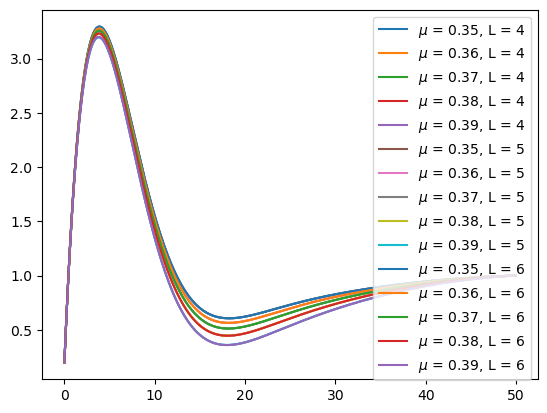

In [70]:
legend = []
for res_all_L, L in zip(res_all, Ls):
    for res, mu in zip(res_all_L,  mu_all):
        plt.plot(x, res)
        legend.append("$\mu$ = {}, L = {}".format(mu, L))
plt.legend(legend)
plt.show()

In [98]:
print("relative L2 error in % between L=4,6 and L=5,6")
for res_4, res_5, res_6, mu in zip(res_all[0], res_all[1], res_all[2], mu_all):
    l2norm6 = np.sqrt(sum((res_6)**2))
    err65 = np.sqrt(sum((res_6-res_5)**2))/l2norm6
    err64 = np.sqrt(sum((res_6-res_4)**2))/l2norm6
    print("mu = ", mu, " err:", err65*100.0, err64*100.0)

relative L2 error in % between L=4,6 and L=5,6
mu =  0.35  err: 0.05378586396459534 0.05471807143425998
mu =  0.36  err: 0.06177863829696392 0.06411337694593607
mu =  0.37  err: 0.07191169483900502 0.07596854153906665
mu =  0.38  err: 0.08520891162396402 0.09155044276223996
mu =  0.39  err: 0.10348411730457036 0.11299089667184099
